In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [3]:
card_01 = pd.read_csv("card_202001.csv")
card_02 = pd.read_csv("card_202002.csv")
card_03 = pd.read_csv("card_202003.csv")
card_04 = pd.read_csv("card_202004.csv")
card_05 = pd.read_csv("card_202005.csv")
card_06 = pd.read_csv("card_202006.csv")

card_01.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230.0
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550.0
2,20200104,1174066000,성내3동,7021,한의원,53,4589800.0
3,20200104,1174066000,성내3동,7020,의원,339,9267240.0
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000.0


### 데이터 가공

In [4]:
adstrd_code_06 = card_06['adstrd_code']
mrhst_induty_cl_code_06 = card_06['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_06:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_06:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card06 = {"receipt_dttm" : card_06['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_06['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_06['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_06['selng_cascnt'], "salamt" : card_06['salamt']}

df_card06 = pd.DataFrame(data_card06)

df_card06.to_csv("df_card06.csv", encoding = 'utf-8-sig')

### 지역코드 다섯자리, 업종코드 두 자리로 csv 파일 변환 완료

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
adstrd=pd.read_csv('adstrd_master.csv')
adstrd['adstrd_code']=adstrd['adstrd_code'].astype(str)
adstrd['exp']=adstrd['adstrd_code'].apply(lambda x:x[:5])
adstrd['total_adstrd']=adstrd['brtc_nm']+' '+adstrd['signgu_nm']

adstrd_name=adstrd[['exp','total_adstrd']]
adstrd_name=adstrd_name.drop_duplicates(['exp'],keep='first')
adstrd_name=adstrd_name.reset_index()
adstrd_name=adstrd_name.drop(['index'],axis=1)
adstrd_name_seoul = adstrd_name[0:25]
adstrd_name_seoul

,exp,total_adstrd
0,11110,서울특별시 종로구
1,11140,서울특별시 중구
2,11170,서울특별시 용산구
3,11200,서울특별시 성동구
4,11215,서울특별시 광진구
5,11230,서울특별시 동대문구
6,11260,서울특별시 중랑구
7,11290,서울특별시 성북구
8,11305,서울특별시 강북구
9,11320,서울특별시 도봉구


In [7]:
card_01 = pd.read_csv("df_card01.csv")
card_02 = pd.read_csv("df_card02.csv")
card_03 = pd.read_csv("df_card03.csv")
card_04 = pd.read_csv("df_card04.csv")
card_05 = pd.read_csv("df_card05.csv")
card_06 = pd.read_csv("df_card06.csv")

card_01.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200104,11740,성내3동,70,약국,463,5843230.0
1,1,20200104,11740,성내3동,70,치과의원,33,7835550.0
2,2,20200104,11740,성내3동,70,한의원,53,4589800.0
3,3,20200104,11740,성내3동,70,의원,339,9267240.0
4,4,20200104,11740,성내3동,61,자동차정비,19,4441000.0


In [8]:
card_01['mrhst_induty_cl_code'].value_counts()
code = []
for i in card_01['mrhst_induty_cl_code'].value_counts().index:
    code.append(i)
print(code , '\n')
print(len(code), "\n")
code.sort()
print(code)

[80, 70, 83, 71, 40, 21, 51, 61, 42, 44, 91, 50, 22, 93, 92, 90, 99, 20, 10, 52, 33, 31, 82, 84, 34, 81, 43, 32, 30, 11, 60, 41, 62, 96, 95] 

35 

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


In [9]:
total_sum = []
seoul01_sum = []
seoul02_sum = []
seoul03_sum = []
seoul04_sum = []
seoul05_sum = []
seoul06_sum = []

In [10]:
is_code = card_01['adstrd_code'] == 11110
for i in code:
    is_name = card_01['mrhst_induty_cl_code'] == i
    seoul = card_01[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul01_sum.append(sum_num)
total_sum.append(seoul01_sum)
print(total_sum[0])

[14543, 6965, 5147, 61849, 15203, 39, 3988, 178, 3042, 1285, 625096, 5079, 19284, 2756, 21386, 274046, 2971, 1412, 85, 38629, 861185, 251856, 25082, 1477633, 5534, 3032, 114966, 1130, 1155, 33556, 1132, 3011, 0, 64, 21373]


In [11]:
is_code = card_02['adstrd_code'] == 11110
for i in code:
    is_name = card_02['mrhst_induty_cl_code'] == i
    seoul = card_02[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum.append(sum_num)
total_sum.append(seoul02_sum)
print(total_sum[1])

[11064, 1713, 4113, 53185, 14490, 67, 3611, 414, 6795, 1178, 510462, 10444, 10669, 2221, 14211, 155872, 4760, 2161, 214, 30047, 1010614, 190869, 21194, 987353, 3567, 2248, 89840, 1627, 1939, 48498, 2027, 2825, 0, 341, 71410]


In [12]:
is_code = card_03['adstrd_code'] == 11110
for i in code:
    is_name = card_03['mrhst_induty_cl_code'] == i
    seoul = card_03[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul03_sum.append(sum_num)
total_sum.append(seoul03_sum)
print(total_sum[2])

[10367, 294, 5676, 47725, 11550, 68, 5892, 548, 9228, 1370, 661950, 13494, 13981, 3273, 15860, 192383, 4205, 1202, 360, 40679, 1080440, 277693, 26499, 1209726, 3331, 2470, 118727, 2517, 2749, 56696, 3205, 2344, 0, 1076, 73219]


In [13]:
is_code = card_04['adstrd_code'] == 11110
for i in code:
    is_name = card_04['mrhst_induty_cl_code'] == i
    seoul = card_04[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul04_sum.append(sum_num)
total_sum.append(seoul04_sum)
print(total_sum[3])

[10973, 378, 7523, 45713, 12647, 108, 6938, 694, 9023, 1666, 680754, 14151, 18015, 4534, 18531, 203937, 4750, 1630, 379, 46228, 1137282, 308079, 27700, 1310614, 1847, 1363, 128294, 2298, 2882, 54011, 3354, 3142, 0, 1224, 74573]


In [14]:
is_code = card_05['adstrd_code'] == 11110
for i in code:
    is_name = card_05['mrhst_induty_cl_code'] == i
    seoul = card_05[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul05_sum.append(sum_num)
total_sum.append(seoul05_sum)
print(total_sum[4])

[39319, 5110, 90760, 172382, 162036, 3456, 30650, 7032, 7708, 21556, 273580, 9009, 92187, 30660, 114374, 130616, 97072, 22804, 12080, 334186, 354551, 523412, 290219, 1123330, 16511, 14348, 228329, 122459, 400803, 66147, 41099, 69918, 0, 5489, 58726]


In [15]:
is_code = card_06['adstrd_code'] == 11110
for i in code:
    is_name = card_06['mrhst_induty_cl_code'] == i
    seoul = card_06[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul06_sum.append(sum_num)
total_sum.append(seoul06_sum)
print(total_sum[5])

[7014, 548, 5015, 21054, 7204, 89, 4134, 498, 4929, 792, 367525, 7431, 13375, 2948, 11818, 98293, 1804, 976, 197, 23369, 131072, 141244, 14225, 691930, 46, 1197, 65389, 1261, 1563, 26352, 1610, 1757, 0, 585, 12507]


In [16]:
print(code, '\n')

for i in total_sum:
    print(i)
    print('\n')
print(len(total_sum))

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99] 

[14543, 6965, 5147, 61849, 15203, 39, 3988, 178, 3042, 1285, 625096, 5079, 19284, 2756, 21386, 274046, 2971, 1412, 85, 38629, 861185, 251856, 25082, 1477633, 5534, 3032, 114966, 1130, 1155, 33556, 1132, 3011, 0, 64, 21373]


[11064, 1713, 4113, 53185, 14490, 67, 3611, 414, 6795, 1178, 510462, 10444, 10669, 2221, 14211, 155872, 4760, 2161, 214, 30047, 1010614, 190869, 21194, 987353, 3567, 2248, 89840, 1627, 1939, 48498, 2027, 2825, 0, 341, 71410]


[10367, 294, 5676, 47725, 11550, 68, 5892, 548, 9228, 1370, 661950, 13494, 13981, 3273, 15860, 192383, 4205, 1202, 360, 40679, 1080440, 277693, 26499, 1209726, 3331, 2470, 118727, 2517, 2749, 56696, 3205, 2344, 0, 1076, 73219]


[10973, 378, 7523, 45713, 12647, 108, 6938, 694, 9023, 1666, 680754, 14151, 18015, 4534, 18531, 203937, 4750, 1630, 379, 46228, 1137282, 308079, 27700, 1310614, 1847, 1363, 128

In [17]:
month_total = []
for i in range(0, len(code)):
    sum_code = 0
    for j in range(0, len(total_sum)):
        sum_code = sum_code + total_sum[j][i]
    month_total.append(sum_code)
    
month_total

[93280,
 15008,
 118234,
 401908,
 223130,
 3827,
 55213,
 9364,
 40725,
 27847,
 3119367,
 59608,
 167511,
 46392,
 196180,
 1055147,
 115562,
 30185,
 13315,
 513138,
 4575144,
 1693153,
 404919,
 6800586,
 30836,
 24658,
 745545,
 131292,
 411091,
 285260,
 52427,
 82997,
 0,
 8779,
 311808]

In [18]:
mean_total = []
month_day = [28, 29, 31, 30, 31, 14]
month = sum(month_day)

for i in month_total:
    mean_total.append(i/month)
mean_total

[572.2699386503067,
 92.07361963190183,
 725.361963190184,
 2465.693251533742,
 1368.8957055214723,
 23.478527607361965,
 338.73006134969324,
 57.4478527607362,
 249.84662576687117,
 170.840490797546,
 19137.220858895704,
 365.69325153374234,
 1027.6748466257668,
 284.6134969325153,
 1203.558282208589,
 6473.294478527608,
 708.9693251533743,
 185.1840490797546,
 81.68711656441718,
 3148.0858895705524,
 28068.36809815951,
 10387.441717791411,
 2484.165644171779,
 41721.386503067486,
 189.17791411042944,
 151.27607361963192,
 4573.895705521472,
 805.4723926380368,
 2522.030674846626,
 1750.0613496932515,
 321.63803680981596,
 509.18404907975463,
 0.0,
 53.85889570552147,
 1912.9325153374234]

### 2월 상반기 상대값 계산

In [19]:
is_date = card_02['receipt_dttm'] < 20200215
df_card02_1 = card_02[is_date]
df_card02_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,4,20200201,11470,신월6동,90,기타건축자재,3,24500.0


In [20]:
seoul02_sum_1 = []

is_code = df_card02_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card02_1['mrhst_induty_cl_code'] == i
    seoul = df_card02_1[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_1.append(sum_num)
    
print(seoul02_sum_1)
print(code)

mean02_1 = []

for i in seoul02_sum_1:
    mean02_1.append(i/14)

Jongrogu02_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_1, 'mean' : mean02_1})
Jongrogu02_1

[3431, 593, 1336, 17115, 4823, 29, 1028, 125, 1962, 358, 137824, 3004, 3322, 678, 4382, 49299, 1321, 684, 59, 8875, 44048, 57306, 6512, 300898, 1153, 722, 26415, 493, 537, 13414, 610, 1089, 0, 80, 6204]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,3431,245.071429
1,11,593,42.357143
2,20,1336,95.428571
3,21,17115,1222.500000
4,22,4823,344.500000
5,30,29,2.071429
6,31,1028,73.428571
7,32,125,8.928571
8,33,1962,140.142857
9,34,358,25.571429


In [21]:
per_02_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu02_1['mean'][i]
    if(a != 0):
        per_02_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_1.append(0)
per_02_1

[-57.17555439843176,
 -53.996439993908005,
 -86.84400667924865,
 -50.419623396399174,
 -74.83372921615202,
 -91.1773489118668,
 -78.3223930182074,
 -84.45795447610911,
 -43.90844514601421,
 -85.03198600516085,
 -48.55798811562913,
 -41.32475027321357,
 -76.9104289099991,
 -82.98444313058901,
 -73.99378122132735,
 -45.601777355599346,
 -86.6909414117839,
 -73.61698099813057,
 -94.84094200954885,
 -79.8630471446556,
 -88.79063541106966,
 -60.59389958092557,
 -81.27569076425515,
 -48.48513894874017,
 -56.46577284435631,
 -65.909064574812,
 -58.74882516433328,
 -95.62812009000658,
 -98.47911671972525,
 -45.250898929297584,
 -86.45327244140833,
 -84.72345816285959,
 0,
 -89.39026573153467,
 -76.83437060168895]

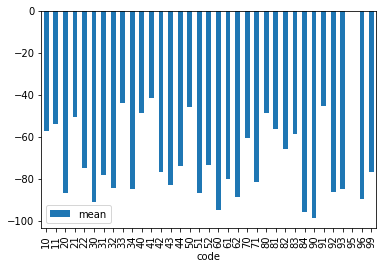

In [22]:
data_02_1 = pd.DataFrame({"code": code, "mean": per_02_1})
data_02_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 2월 전체 상대값 계산

In [23]:
seoul02_sum = []

is_code = card_02['adstrd_code'] == 11110

for i in code:
    is_name = card_02['mrhst_induty_cl_code'] == i
    seoul = card_02[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum.append(sum_num)
    
print(seoul02_sum)
print(code)

mean02 = []

for i in seoul02_sum:
    mean02.append(i/29)

Jongrogu02 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum, 'mean' : mean02})
Jongrogu02

[11064, 1713, 4113, 53185, 14490, 67, 3611, 414, 6795, 1178, 510462, 10444, 10669, 2221, 14211, 155872, 4760, 2161, 214, 30047, 1010614, 190869, 21194, 987353, 3567, 2248, 89840, 1627, 1939, 48498, 2027, 2825, 0, 341, 71410]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,11064,381.517241
1,11,1713,59.068966
2,20,4113,141.827586
3,21,53185,1833.965517
4,22,14490,499.655172
5,30,67,2.310345
6,31,3611,124.517241
7,32,414,14.275862
8,33,6795,234.310345
9,34,1178,40.620690


In [24]:
per_02 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu02['mean'][i]
    if(a != 0):
        per_02.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02.append(0)
per_02

[-33.33264328384692,
 -35.84593963679141,
 -80.44733617087797,
 -25.620694459840347,
 -63.49939806236352,
 -90.15975419658866,
 -63.23997909038164,
 -75.14987700511129,
 -6.218327300438175,
 -76.22303151580743,
 -8.021451699699945,
 -1.5191203217341902,
 -64.20107459746853,
 -73.09115424181338,
 -59.284524064810284,
 -16.96814397131069,
 -76.84837337652456,
 -59.76044278672325,
 -90.96637186476232,
 -67.0878278223469,
 24.15669660173348,
 -36.638011225618506,
 -70.58056140815222,
 -18.39519722118877,
 -34.98183940848359,
 -48.75776484375219,
 -32.2693118965737,
 -93.03471493391409,
 -97.34887962972205,
 -4.440788439826213,
 -78.26856785428409,
 -80.86864793201916,
 0,
 -78.16772784583901,
 28.724551094218896]

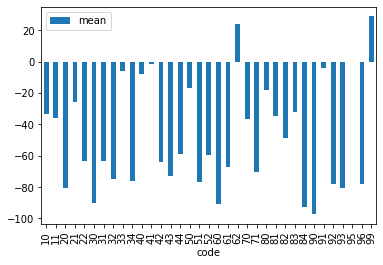

In [25]:
data_02 = pd.DataFrame({"code": code, "mean": per_02})
data_02.plot(x = "code", y = "mean", kind = 'bar')

### 날짜 별로 구분

In [26]:
count = card_02['receipt_dttm'].value_counts().index
date02 = []
for i in count:
    date02.append(i)
date02.sort()
date02

[20200201,
 20200202,
 20200203,
 20200205,
 20200206,
 20200214,
 20200215,
 20200216,
 20200217,
 20200218,
 20200219,
 20200220,
 20200221,
 20200222,
 20200223,
 20200224,
 20200225,
 20200226,
 20200227,
 20200228,
 20200229]

In [27]:
data_day = []
is_code = card_02['adstrd_code'] == 11110
num = 0

for i in date02:
    sum_day = []
    is_date = card_02['receipt_dttm'] == i
    for j in code:
        is_name = card_02['mrhst_induty_cl_code'] == j
        seoul = card_02[is_code & is_date & is_name]
        seoul = seoul.astype({'selng_cascnt' : int})
        sum_num = sum(seoul['selng_cascnt'])
        sum_day.append(sum_num)
    data_day.append(sum_day)
    print(data_day[num], " ", i, "\n")
    num = num+1

[737, 30, 256, 3292, 667, 4, 204, 32, 356, 77, 27822, 591, 614, 128, 752, 8092, 306, 114, 11, 1678, 16969, 13363, 1304, 55941, 235, 124, 5031, 91, 107, 4105, 117, 226, 0, 11, 941]   20200201 

[512, 34, 304, 2756, 883, 8, 138, 20, 277, 55, 15916, 303, 781, 129, 931, 8626, 170, 152, 10, 1150, 7866, 7039, 1214, 38471, 279, 173, 4031, 90, 70, 2370, 130, 118, 0, 20, 882]   20200202 

[511, 166, 145, 2263, 791, 7, 50, 5, 212, 30, 12314, 281, 468, 57, 640, 9452, 94, 97, 0, 832, 2227, 1534, 788, 38324, 191, 141, 2805, 99, 27, 190, 6, 35, 0, 7, 1196]   20200203 

[675, 86, 192, 2112, 957, 2, 244, 22, 327, 76, 28179, 634, 402, 114, 643, 7698, 352, 119, 11, 1663, 6724, 12656, 967, 53955, 128, 87, 4622, 76, 101, 1891, 114, 327, 0, 10, 1121]   20200205 

[442, 155, 185, 4356, 677, 7, 194, 19, 388, 48, 25902, 575, 404, 115, 639, 7449, 192, 84, 12, 1718, 5642, 11509, 995, 53963, 124, 79, 4593, 48, 99, 1545, 112, 223, 0, 7, 996]   20200206 

[554, 122, 254, 2336, 848, 1, 198, 27, 402, 72, 27691, 620,

In [28]:
data_day02 = pd.DataFrame({"date" : date02, "day_sum" : data_day})
data_day02

,date,day_sum
0,20200201,"[737, 30, 256, 3292, 667, 4, 204, 32, 356, 77,..."
1,20200202,"[512, 34, 304, 2756, 883, 8, 138, 20, 277, 55,..."
2,20200203,"[511, 166, 145, 2263, 791, 7, 50, 5, 212, 30, ..."
3,20200205,"[675, 86, 192, 2112, 957, 2, 244, 22, 327, 76,..."
4,20200206,"[442, 155, 185, 4356, 677, 7, 194, 19, 388, 48..."
5,20200214,"[554, 122, 254, 2336, 848, 1, 198, 27, 402, 72..."
6,20200215,"[628, 100, 261, 3014, 880, 2, 175, 32, 409, 65..."
7,20200216,"[654, 70, 354, 3494, 815, 5, 150, 24, 283, 63,..."
8,20200217,"[418, 115, 146, 2532, 703, 0, 81, 12, 183, 32,..."
9,20200218,"[568, 106, 157, 2352, 582, 0, 236, 14, 309, 60..."


In [29]:
per= []
for i in range(0, len(data_day)):
    per_day = []
    for j in range(0, len(mean_total)):
        a = mean_total[j]
        b = data_day02['day_sum'][i][j]
        if(a != 0):
            per_day.append( ( ( b - a ) / a ) * 100 )
        else:
            per_day.append(0)
    per.append(per_day)

In [30]:
per[0]

[28.785377358490578,
 -67.41737739872067,
 -64.70727540301436,
 33.51214705853082,
 -51.27459328642495,
 -82.96315651946695,
 -39.775052976654045,
 -44.29730884237505,
 42.48741559238797,
 -54.92871763565196,
 45.38161107686272,
 61.61085760300631,
 -40.2534758911355,
 -55.02672874633557,
 -37.518605362422264,
 25.00589965189684,
 -56.83875322337792,
 -38.439622328971346,
 -86.53398422831393,
 -46.697769410957676,
 -39.54404495246489,
 28.645727822588977,
 -47.50752619659735,
 34.08231290656422,
 24.22168893501103,
 -18.030659420877612,
 9.993762951934492,
 -88.70228193644701,
 -95.75738705055572,
 134.5632054967398,
 -63.623705342666945,
 -55.615263202284424,
 0,
 -79.57626153320425,
 -50.808510365353044]

### 2월 하반기 상대값 계산

In [33]:
is_date = card_02['receipt_dttm'] > 20200214
df_card02_2 = card_02[is_date]
df_card02_2.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
160531,160531,20200215,11710,거여1동,70,동물병원,13,730100.0
160532,160532,20200215,11680,대치4동,70,약국,442,7531530.0
160533,160533,20200215,11650,서초1동,80,서양음식,1840,19929464.0
160534,160534,20200215,11440,대흥동,71,미 용 원,59,2890700.0
160535,160535,20200215,11260,망우본동,70,약국,394,6041060.0


In [42]:
seoul02_sum_2 = []

is_code = df_card02_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card02_2['mrhst_induty_cl_code'] == i
    seoul = df_card02_2[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul02_sum_2.append(sum_num)
    
print(seoul02_sum_2)
print(code)

mean02_2 = []

for i in seoul02_sum_2:
    mean02_2.append(i/15)

Jongrogu02_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_2, 'mean' : mean02_2})
Jongrogu02_2

[7633, 1120, 2777, 36070, 9667, 38, 2583, 289, 4833, 820, 372638, 7440, 7347, 1543, 9829, 106573, 3439, 1477, 155, 21172, 966566, 133563, 14682, 686455, 2414, 1526, 63425, 1134, 1402, 35084, 1417, 1736, 0, 261, 65206]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,7633,508.866667
1,11,1120,74.666667
2,20,2777,185.133333
3,21,36070,2404.666667
4,22,9667,644.466667
5,30,38,2.533333
6,31,2583,172.200000
7,32,289,19.266667
8,33,4833,322.200000
9,34,820,54.666667


In [43]:
per_02_2 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu02_2['mean'][i]
    if(a != 0):
        per_02_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_2.append(0)
per_02_2

[-11.079259576901078,
 -18.905472636815908,
 -74.47711036306534,
 -2.475027452385452,
 -52.920688985494245,
 -89.20999912899572,
 -49.16305942441092,
 -66.46233803217999,
 28.95911602209944,
 -68.00134065907758,
 29.812648955167305,
 35.63280096631324,
 -52.339010572440024,
 -63.85741794562281,
 -45.55588405206103,
 9.756580520692058,
 -67.66197654361584,
 -46.82767378940975,
 -87.35010639629492,
 -55.164289788192136,
 129.57420648034974,
 -14.279182093998585,
 -60.598440675789476,
 9.688748391192552,
 -14.930168201669039,
 -32.74988509476303,
 -7.555099513331416,
 -90.61420345489442,
 -96.29399167905241,
 33.64864801701373,
 -70.6295102396348,
 -77.2708250499014,
 0,
 -67.69335915252307,
 127.24621134373288]

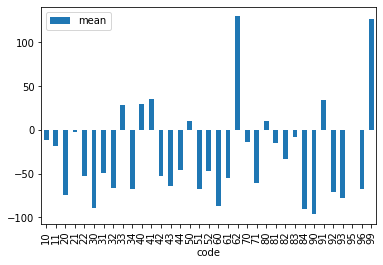

In [44]:
data_02_2 = pd.DataFrame({"code": code, "mean": per_02_2})
data_02_2.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 3월 상반기 상대값 계산

In [45]:
is_date = card_03['receipt_dttm'] < 20200316
df_card03_1 = card_03[is_date]
df_card03_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200301,11545,시흥4동,90,조명 기구,1,15000.0
1,1,20200301,11140,광희동,80,일반한식,952,25644550.0
2,2,20200301,11710,잠실본동,71,미 용 원,121,6493950.0
3,3,20200301,11620,서림동,83,정 육 점,50,1273200.0
4,4,20200301,11740,둔촌2동,71,미 용 원,47,1636300.0


In [47]:
seoul03_sum_1 = []

is_code = df_card03_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card03_1['mrhst_induty_cl_code'] == i
    seoul = df_card03_1[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul03_sum_1.append(sum_num)
    
print(seoul03_sum_1)
print(code)

mean03_1 = []

for i in seoul03_sum_1:
    mean03_1.append(i/15)

Jongrogu03_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul03_sum_1, 'mean' : mean03_1})
Jongrogu03_1

[4986, 395, 2380, 25139, 5307, 26, 2898, 245, 4418, 641, 307576, 6387, 6043, 1487, 7165, 86742, 1361, 536, 171, 18417, 132055, 127294, 12479, 554640, 1748, 1318, 56492, 1166, 1261, 29883, 1492, 1276, 0, 411, 10455]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,4986,332.400000
1,11,395,26.333333
2,20,2380,158.666667
3,21,25139,1675.933333
4,22,5307,353.800000
5,30,26,1.733333
6,31,2898,193.200000
7,32,245,16.333333
8,33,4418,294.533333
9,34,641,42.733333


In [48]:
per_03_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu03_1['mean'][i]
    if(a != 0):
        per_03_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_03_1.append(0)
per_03_1

[-41.91552315608919,
 -71.39969793887705,
 -78.12586340082662,
 -32.029933882049285,
 -74.15434948236455,
 -92.61736782510233,
 -42.963432524948836,
 -71.56841805496228,
 17.885655821567433,
 -74.98641385666917,
 7.147567652881717,
 16.43638437793585,
 -60.79823613573636,
 -65.16913835718802,
 -60.31212831753151,
 -10.66681704065879,
 -87.2020791148186,
 -80.70388161890565,
 -86.04431092752533,
 -60.998522814525536,
 -68.63491801205238,
 -18.302630260427343,
 -66.51055313943446,
 -11.37399041788458,
 -38.400138366411554,
 -41.9163489874821,
 -17.660270898023146,
 -90.34934852593202,
 -96.6667072091905,
 13.836009254715004,
 -69.07496773291116,
 -83.29353269796901,
 0,
 -49.126324182708736,
 -63.56379566912972]

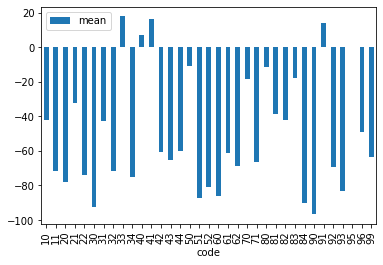

In [49]:
data_03_1 = pd.DataFrame({"code": code, "mean": per_03_1})
data_03_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 3월 하반기 상대값 계산

In [50]:
is_date = card_03['receipt_dttm'] > 20200315
df_card03_2 = card_03[is_date]
df_card03_2.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
376104,376104,20200316,11290,삼선동,10,기타숙박업,12,528000.0
376105,376105,20200316,11680,역삼1동,80,서양음식,5424,70725305.0
376106,376106,20200316,11440,서교동,80,일반한식,4441,131872050.0
376107,376107,20200316,11740,명일2동,40,편 의 점,404,2209050.0
376108,376108,20200316,11380,갈현1동,71,미 용 원,37,1616800.0


In [51]:
seoul03_sum_2 = []

is_code = df_card03_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card03_2['mrhst_induty_cl_code'] == i
    seoul = df_card03_2[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul03_sum_2.append(sum_num)
    
print(seoul03_sum_2)
print(code)

mean03_2 = []

for i in seoul03_sum_2:
    mean03_2.append(i/16)

Jongrogu03_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul03_sum_2, 'mean' : mean03_2})
Jongrogu03_2

[5381, -101, 3296, 22586, 6243, 42, 2994, 303, 4810, 729, 354374, 7107, 7938, 1786, 8695, 105641, 2844, 666, 189, 22262, 948385, 150399, 14020, 655086, 1583, 1152, 62235, 1351, 1488, 26813, 1713, 1068, 0, 665, 62764]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,5381,336.3125
1,11,-101,-6.3125
2,20,3296,206.0000
3,21,22586,1411.6250
4,22,6243,390.1875
5,30,42,2.6250
6,31,2994,187.1250
7,32,303,18.9375
8,33,4810,300.6250
9,34,729,45.5625


In [52]:
per_03_2 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu03_2['mean'][i]
    if(a != 0):
        per_03_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_03_2.append(0)
per_03_2

[-41.23184230274442,
 -106.85592683901919,
 -71.60038567586312,
 -42.749366770504686,
 -71.49618495944068,
 -88.81957146590018,
 -44.75689602086465,
 -67.03532144382743,
 20.32381829343155,
 -73.3303856788882,
 15.734542456851033,
 21.464505603274723,
 -51.7235435284847,
 -60.7801452836696,
 -54.84742965643796,
 1.9969433169027582,
 -74.928393416521,
 -77.52236210038099,
 -85.53933533608712,
 -55.80250829211635,
 111.17744463343666,
 -9.506712476663361,
 -64.72658729276719,
 -1.8659770643294598,
 -47.70134745103126,
 -52.4048990185741,
 -14.958981349214332,
 -89.5170212198763,
 -96.31249528693161,
 -4.242642676856199,
 -66.71335857478017,
 -86.89079123341807,
 0,
 -22.830760906709187,
 105.06473534995895]

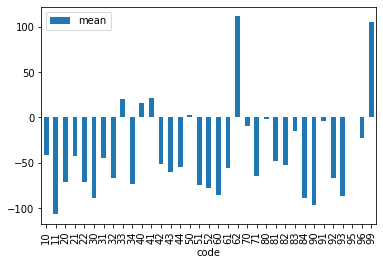

In [53]:
data_03_2 = pd.DataFrame({"code": code, "mean": per_03_2})
data_03_2.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 4월 상반기 상대값 계산

In [54]:
is_date = card_04['receipt_dttm'] < 20200416
df_card04_1 = card_04[is_date]
df_card04_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200401,11530,구로5동,92,가정용품수리,43,3458100.0
1,1,20200401,11680,신사동,42,스포츠의류,1,516800.0
2,2,20200401,11710,오금동,44,기타잡화,1,85000.0
3,3,20200401,11620,난향동,21,기타레져업,19,95300.0
4,4,20200401,11710,가락2동,70,제약회사,7,6700000.0


In [55]:
seoul04_sum_1 = []

is_code = df_card04_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card04_1['mrhst_induty_cl_code'] == i
    seoul = df_card04_1[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul04_sum_1.append(sum_num)
    
print(seoul04_sum_1)
print(code)

mean04_1 = []

for i in seoul04_sum_1:
    mean04_1.append(i/15)

Jongrogu04_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul04_sum_1, 'mean' : mean04_1})
Jongrogu04_1

[4928, 8, 3545, 21160, 5727, 47, 3159, 347, 4428, 815, 335238, 7161, 8336, 1884, 8520, 97838, 1592, 751, 213, 23116, 165089, 155203, 13457, 638380, 448, 473, 64165, 1119, 1418, 28313, 1714, 1528, 0, 640, 11938]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,4928,328.533333
1,11,8,0.533333
2,20,3545,236.333333
3,21,21160,1410.666667
4,22,5727,381.800000
5,30,47,3.133333
6,31,3159,210.600000
7,32,347,23.133333
8,33,4428,295.200000
9,34,815,54.333333


In [57]:
per_04_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu04_1['mean'][i]
    if(a != 0):
        per_04_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_04_1.append(0)
per_04_1

[-42.591194968553445,
 -99.42075337597726,
 -67.4185654436682,
 -42.788233459730414,
 -72.10890512257428,
 -86.65447260691577,
 -37.82659880825168,
 -59.731596183966964,
 18.152486187845295,
 -68.19645443554661,
 16.78393725393647,
 30.546570930076488,
 -45.92323290211787,
 -55.869977582341775,
 -52.8066061779998,
 0.7606459889791043,
 -85.02991179338075,
 -72.96383413395175,
 -82.61659782200526,
 -51.047502491207695,
 -60.78883783038669,
 -0.39061640225858607,
 -63.885929449264346,
 2.006836861803763,
 -84.21239244173476,
 -79.15510855165329,
 -6.476514943207087,
 -90.73835420284556,
 -96.25169771818568,
 7.855266540466009,
 -64.47352191300921,
 -79.99413633424501,
 0,
 -20.78065079545886,
 -58.395465585659544]

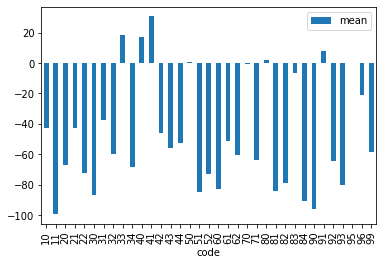

In [58]:
data_04_1 = pd.DataFrame({"code": code, "mean": per_04_1})
data_04_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 4월 하반기 상대값 계산

In [59]:
is_date = card_04['receipt_dttm'] > 20200415
df_card04_2 = card_04[is_date]
df_card04_2.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
385832,385832,20200416,11710,마천2동,80,일식회집,10,516000.0
385833,385833,20200416,11590,사당1동,44,악세 사리,30,451450.0
385834,385834,20200416,11710,잠실2동,80,일반한식,153,1770930.0
385835,385835,20200416,11170,남영동,70,한의원,8,252000.0
385836,385836,20200416,11680,압구정동,70,의원,169,67386370.0


In [60]:
seoul04_sum_2 = []

is_code = df_card04_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card04_2['mrhst_induty_cl_code'] == i
    seoul = df_card04_2[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul04_sum_2.append(sum_num)
    
print(seoul04_sum_2)
print(code)

mean04_2 = []

for i in seoul04_sum_2:
    mean04_2.append(i/15)

Jongrogu04_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul04_sum_2, 'mean' : mean04_2})
Jongrogu04_2

[6045, 370, 3978, 24553, 6920, 61, 3779, 347, 4595, 851, 345516, 6990, 9679, 2650, 10011, 106099, 3158, 879, 166, 23112, 972193, 152876, 14243, 672234, 1399, 890, 64129, 1179, 1464, 25698, 1640, 1614, 0, 584, 62635]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,6045,403.000000
1,11,370,24.666667
2,20,3978,265.200000
3,21,24553,1636.866667
4,22,6920,461.333333
5,30,61,4.066667
6,31,3779,251.933333
7,32,347,23.133333
8,33,4595,306.333333
9,34,851,56.733333


In [61]:
per_04_2 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu04_2['mean'][i]
    if(a != 0):
        per_04_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_04_2.append(0)
per_04_2

[-29.57868782161234,
 -73.20984363894812,
 -63.438943112810186,
 -33.614342917616305,
 -66.29886911964626,
 -82.67920912812473,
 -25.624158561691385,
 -59.731596183966964,
 22.60855330468589,
 -66.79163524496954,
 20.364394442846915,
 27.42920413367333,
 -37.21100902826282,
 -37.92751623843191,
 -44.547762259149756,
 9.268421050968877,
 -70.30430995194499,
 -68.35580586383966,
 -86.45237201151585,
 -51.05597324696281,
 130.91070503281793,
 -1.8840864745635293,
 -61.77656930563068,
 7.416372647886512,
 -50.698966575863714,
 -60.778111228269395,
 -6.5289866249969295,
 -90.24175121104103,
 -96.13010258069382,
 -2.1062889995092147,
 -66.00733718630985,
 -78.86815186091064,
 0,
 -27.712343850856215,
 118.2861461754242]

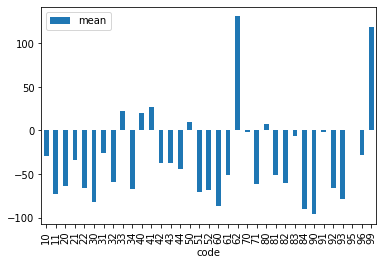

In [62]:
data_04_2 = pd.DataFrame({"code": code, "mean": per_04_2})
data_04_2.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 5월 상반기 상대값 계산

In [64]:
is_date = card_05['receipt_dttm'] < 20200516
df_card05_1 = card_05[is_date]
df_card05_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200501,11500,화곡2동,83,정 육 점,17.0,481200.0
1,1,20200501,11215,자양1동,80,스넥,188.0,2777400.0
2,2,20200501,11560,문래동,61,주 차 장,63.0,375000.0
3,3,20200501,11620,신사동,80,서양음식,406.0,3421500.0
4,4,20200501,11200,성수1가2동,61,주 차 장,37.0,259500.0


In [66]:
seoul05_sum_1 = []

is_code = df_card05_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card05_1['mrhst_induty_cl_code'] == i
    seoul = df_card05_1[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul05_sum_1.append(sum_num)
    
print(seoul05_sum_1)
print(code)

mean05_1 = []

for i in seoul05_sum_1:
    mean05_1.append(i/15)

Jongrogu05_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul05_sum_1, 'mean' : mean05_1})
Jongrogu05_1

[18126, 2867, 62508, 53043, 102932, 1256, 7316, 3317, 4582, 6411, 169793, 5932, 32633, 18774, 46809, 81379, 48380, 6409, 2497, 43366, 28717, 114447, 77443, 504104, 9898, 4314, 124140, 6446, 380125, 17033, 20211, 34667, 0, 921, 32767]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,18126,1208.400000
1,11,2867,191.133333
2,20,62508,4167.200000
3,21,53043,3536.200000
4,22,102932,6862.133333
5,30,1256,83.733333
6,31,7316,487.733333
7,32,3317,221.133333
8,33,4582,305.466667
9,34,6411,427.400000


In [68]:
per_05_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu05_1['mean'][i]
    if(a != 0):
        per_05_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_05_1.append(0)
per_05_1

[111.15909090909095,
 107.58750888415068,
 474.4993825803069,
 43.41605541566727,
 401.2897115284065,
 256.6379235258252,
 43.98879490941144,
 284.9288053538374,
 22.261673828524646,
 150.174884188602,
 -40.850693960238296,
 8.141636469377703,
 111.69471457595822,
 339.7542679772374,
 159.28117035375675,
 -16.190022180163847,
 354.9327056760296,
 130.7254154933466,
 103.78570534484916,
 -8.16430148095315,
 -93.1792733372618,
 -26.54784298879073,
 107.83101476262331,
 -19.44914550991145,
 248.80745449042246,
 90.11598669802903,
 80.93984937193596,
 -46.648285247133614,
 904.8119921542108,
 -35.11465563579424,
 318.91811471188515,
 353.8895783381728,
 0,
 14.001594714659987,
 14.19465397509578]

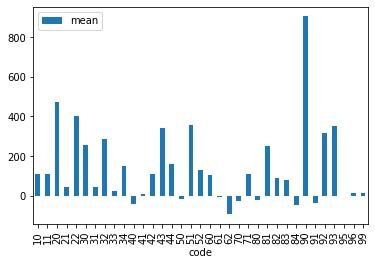

In [69]:
data_05_1 = pd.DataFrame({"code": code, "mean": per_05_1})
data_05_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 5월 하반기 상대값 계산

In [70]:
is_date = card_05['receipt_dttm'] > 20200515
df_card05_2 = card_05[is_date]
df_card05_2.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
389400,389400,20200516,11680,삼성1동,21,스크린골프,462.0,422000.0
389401,389401,20200516,11650,방배4동,83,미곡상,4949.0,190000.0
389402,389402,20200516,11650,서초4동,21,당구장,276.0,188800.0
389403,389403,20200516,11500,가양1동,40,편 의 점,33.0,30976350.0
389404,389404,20200516,11140,소공동,80,스넥,835.0,5590800.0


In [71]:
seoul05_sum_2 = []

is_code = df_card05_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card05_2['mrhst_induty_cl_code'] == i
    seoul = df_card05_2[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul05_sum_2.append(sum_num)
    
print(seoul05_sum_2)
print(code)

mean05_2 = []

for i in seoul05_sum_2:
    mean05_2.append(i/16)

Jongrogu05_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul05_sum_2, 'mean' : mean05_2})
Jongrogu05_2

[21193, 2243, 28252, 119339, 59104, 2200, 23334, 3715, 3126, 15145, 103787, 3077, 59554, 11886, 67565, 49237, 48692, 16395, 9583, 290820, 325834, 408965, 212776, 619226, 6613, 10034, 104189, 116013, 20678, 49114, 20888, 35251, 0, 4568, 25959]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,21193,1324.5625
1,11,2243,140.1875
2,20,28252,1765.7500
3,21,119339,7458.6875
4,22,59104,3694.0000
5,30,2200,137.5000
6,31,23334,1458.3750
7,32,3715,232.1875
8,33,3126,195.3750
9,34,15145,946.5625


In [72]:
per_05_2 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu05_2['mean'][i]
    if(a != 0):
        per_05_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_05_2.append(0)
per_05_2

[131.4576409734134,
 52.25588019722815,
 143.43018928565388,
 202.49859731580364,
 169.85255232375746,
 485.64149464332365,
 330.54194664300076,
 304.17089384878255,
 -21.802025782688766,
 454.0621521169246,
 -66.1043390373752,
 -47.41152613743122,
 262.1889756493604,
 161.01186627004657,
 250.86065730451628,
 -52.46141651352845,
 329.24988317959185,
 453.33464469107173,
 633.2092564776567,
 477.37465360195495,
 -27.44635196181803,
 146.06937101963024,
 435.33064637618884,
 -7.237922217291278,
 118.47819918277338,
 314.55663476356557,
 42.36906390626991,
 800.193795128416,
 -48.75657092955088,
 75.40099383019,
 305.891048505541,
 332.6898110775088,
 0,
 430.0888483881992,
 -15.18584754079434]

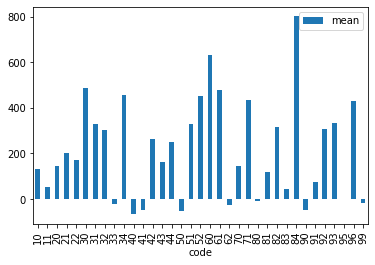

In [73]:
data_05_2 = pd.DataFrame({"code": code, "mean": per_05_2})
data_05_2.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 6월 상반기 상대값 계산

In [79]:
is_date = card_05['receipt_dttm'] < 20200615
df_card06_1 = card_06[is_date]
df_card06_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200601,11560,대림2동,80,주점,74,5471100
1,1,20200601,11200,성수2가1동,80,일반한식,429,11876060
2,2,20200601,11560,신길1동,90,기타건축자재,3,59800
3,3,20200601,11680,일원본동,40,슈퍼 마켓,145,2293030
4,4,20200601,11560,양평2동,71,사우나,12,102500


In [80]:
seoul06_sum_1 = []

is_code = df_card06_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card06_1['mrhst_induty_cl_code'] == i
    seoul = df_card06_1[is_code & is_name]
    seoul = seoul.astype({'selng_cascnt' : int})
    sum_num = sum(seoul['selng_cascnt'])
    seoul06_sum_1.append(sum_num)
    
print(seoul06_sum_1)
print(code)

mean06_1 = []

for i in seoul06_sum_1:
    mean06_1.append(i/14)

Jongrogu06_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul06_sum_1, 'mean' : mean06_1})
Jongrogu06_1

[7014, 548, 5015, 21054, 7204, 89, 4134, 498, 4929, 792, 367525, 7431, 13375, 2948, 11818, 98293, 1804, 976, 197, 23369, 131072, 141244, 14225, 691930, 46, 1197, 65389, 1261, 1563, 26352, 1610, 1757, 0, 585, 12507]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,7014,501.000000
1,11,548,39.142857
2,20,5015,358.214286
3,21,21054,1503.857143
4,22,7204,514.571429
5,30,89,6.357143
6,31,4134,295.285714
7,32,498,35.571429
8,33,4929,352.071429
9,34,792,56.571429


In [81]:
per_06_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu06_1['mean'][i]
    if(a != 0):
        per_06_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_06_1.append(0)
per_06_1

[-12.45390222984562,
 -57.48743527261651,
 -50.61578854523354,
 -39.00874969253801,
 -62.40974191854845,
 -72.9235880398671,
 -12.82565441368622,
 -38.0804906328187,
 40.91502236253616,
 -66.88640479354021,
 37.17658330772146,
 45.145066817493344,
 -7.037021875748875,
 -26.01495331707436,
 -29.862735388782895,
 8.459897733951488,
 -81.82472241245887,
 -62.35405475756644,
 -82.77399281154445,
 -46.976850560389494,
 -66.64470951234385,
 -2.8744765366322875,
 -59.0980806390555,
 18.460999432359834,
 -98.26316179604544,
 -43.48081758455674,
 2.1152023974791168,
 -88.8175647738302,
 -95.57329503339024,
 7.555413106839874,
 -64.24552234535639,
 -75.352723592419,
 0,
 -22.41631816184726,
 -53.29907690446869]

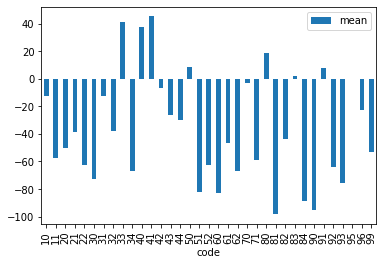

In [82]:
data_06_1 = pd.DataFrame({"code": code, "mean": per_06_1})
data_06_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.